In [6]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [14]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [16]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.5267 - acc: 0.7754 - val_loss: 0.3974 - val_acc: 0.8665
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3286 - acc: 0.8913 - val_loss: 0.3158 - val_acc: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2448 - acc: 0.9182 - val_loss: 0.2881 - val_acc: 0.8879
Epoch 4/20
30/30 [==============================] - 2s 61ms/step - loss: 0.1968 - acc: 0.9351 - val_loss: 0.2850 - val_acc: 0.8852
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1610 - acc: 0.9498 - val_loss: 0.2966 - val_acc: 0.8802
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1372 - acc: 0.9582 - val_loss: 0.2839 - val_acc: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1189 - acc: 0.9634 - val_loss: 0.3046 - val_acc: 0.8847
Epoch 8/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0982 - a

In [27]:
history_dict = history.history
key = history_dict.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

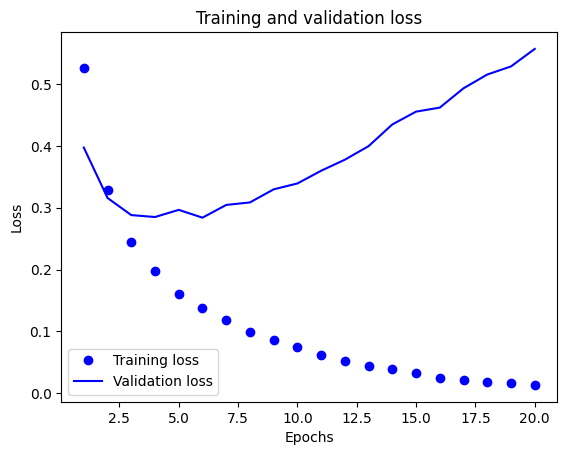

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

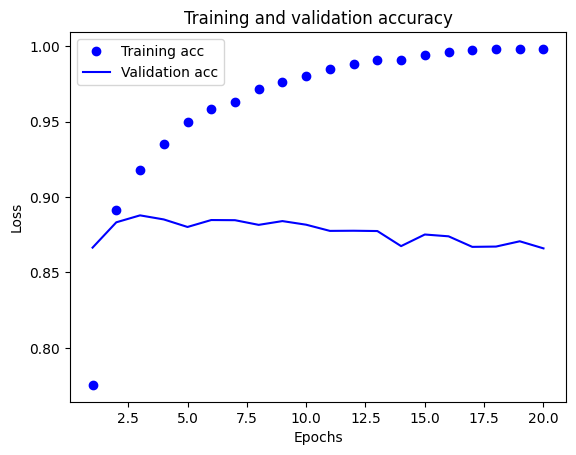

In [30]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4831 - accuracy: 0.8118
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2844 - accuracy: 0.8989
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2214 - accuracy: 0.9197
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2948 - accuracy: 0.8804


In [32]:
results

[0.29480040073394775, 0.8803600072860718]

In [33]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.15567985],
       [0.99875814],
       [0.49083674],
       ...,
       [0.07223642],
       [0.04971011],
       [0.48940486]], dtype=float32)